In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score,classification_report
from imblearn.over_sampling import SMOTE

In [27]:
os.chdir("C:/Users/Shivam Mishra/Documents/edwisor/Project/INSAID/Telecom")

In [28]:
os.getcwd()

'C:\\Users\\Shivam Mishra\\Documents\\edwisor\\Project\\INSAID\\Telecom'

In [33]:
data=pd.read_csv("Churn.csv")

In [34]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
report=pandas_profiling.ProfileReport(data)

In [7]:
report

In [35]:
for i in range(0,data.shape[1]):
    if(data.iloc[:,i].dtypes=="object"):
        data.iloc[:,i]=data.iloc[:,i].astype("category")
        data.iloc[:,i]=data.iloc[:,i].cat.codes


0    5174
1    1869
Name: Churn, dtype: int64


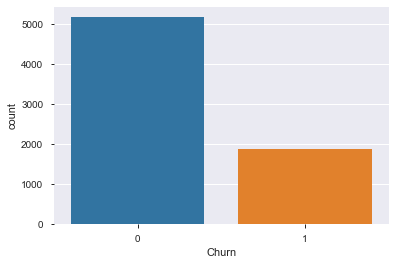

In [11]:
print(data["Churn"].value_counts())
sns.countplot(data["Churn"])


In [24]:
cnames=["tenure","MonthlyCharges","TotalCharges"]
for i in cnames:
    data[i]=(data[i]-data[i].mean())/(data[i].std())

In [168]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [12]:
corr=data.corr()
corr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


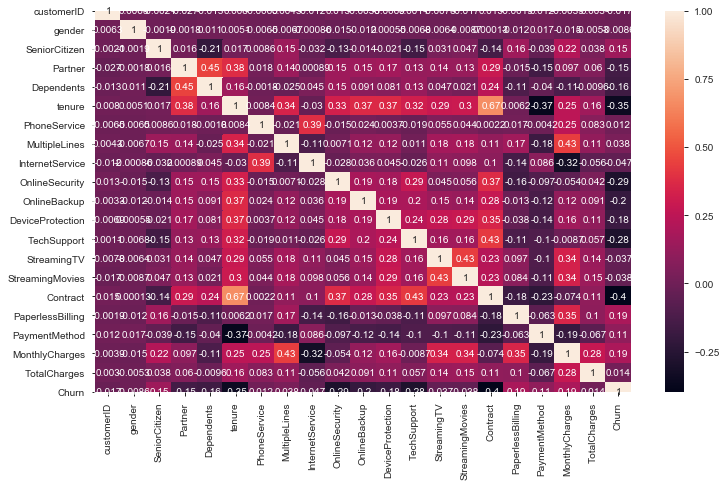

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

In [14]:
ct=data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
categories=ct.columns
print(categories)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [109]:
tr=data[categories].drop(['customerID'],axis=1)
tr.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,1:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

               Specs         Score
4             tenure  16278.923685
17    MonthlyCharges   3680.787699
18      TotalCharges   1616.483021
14          Contract   1115.780167
8     OnlineSecurity    551.611529
11       TechSupport    523.303866
9       OnlineBackup    230.086520
10  DeviceProtection    191.303140
1      SeniorCitizen    134.351545
3         Dependents    133.036443
15  PaperlessBilling    105.680863
2            Partner     82.412083
16     PaymentMethod     58.492250
7    InternetService      9.821028
6      MultipleLines      9.746921
13   StreamingMovies      8.235399


In [49]:
columns=featureScores[featureScores["Score"]<=50]
drop_columns=columns["Specs"]
print(drop_columns)

0              gender
5        PhoneService
6       MultipleLines
7     InternetService
12        StreamingTV
13    StreamingMovies
Name: Specs, dtype: object


In [50]:
drop=["gender","PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies"]

In [52]:
train=data.drop(drop,axis=1)

In [99]:
for i in cnames:
    train[i]=(train[i]-train[i].mean())/(train[i].std())

In [100]:
train.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,1,0,-1.277354,0,2,0,0,0,1,2,-1.160241,-0.398579,0
1,3962,0,0,0,0.066323,2,0,2,0,1,0,3,-0.259611,-0.948695,0
2,2564,0,0,0,-1.236636,2,2,0,0,0,1,3,-0.362635,-1.641767,1
3,5535,0,0,0,0.514215,2,0,2,2,1,0,0,-0.746482,-0.983640,0
4,6511,0,0,0,-1.236636,0,0,0,0,0,1,2,0.197351,-1.235136,1


In [186]:
data1=data.copy()

In [187]:
for i in cnames:
    data1[i]=(data1[i]-data1[i].mean())/(data1.std())

In [188]:
X=data1.drop(['customerID','Churn'],axis=1)
y=data1["Churn"]

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)
assert(X_train.shape[1]==X_test.shape[1])


In [103]:
X_test.shape

(2113, 13)

In [104]:
classifier=LogisticRegression()

In [105]:
log_reg=classifier.fit(X_train,y_train)

In [106]:
y_train.shape

(4930,)

In [107]:
pred=log_reg.predict(X_test)

In [108]:
pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [109]:
cm=pd.crosstab(pred,y_test)

In [110]:
cm

Churn,0,1
row_0,,
0,1390,272
1,149,302


In [111]:
(1396+312)/(1396+312+142+262)

0.8087121212121212

In [112]:
TN=cm.iloc[0,0]
FP=cm.iloc[0,1]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]

In [113]:
precision=TP/(TP+FP)
print(precision)
recall=TP/(TP+FN)
print(recall)
f1_score=2*precision*recall/(precision+recall)
print(f1_score)

0.5261324041811847
0.6696230598669624
0.5892682926829268


In [114]:
DT_cl=DecisionTreeClassifier(random_state=42)

In [115]:
DT_tr=DT_cl.fit(X_train,y_train)

In [116]:
DT_pred=DT_tr.predict(X_test)

In [117]:
CM=pd.crosstab(DT_pred,y_test)

In [118]:
CM

Churn,0,1
row_0,,
0,1275,294
1,264,280


In [119]:
(855+170)/(855+170+203+181)

0.7274662881476224

In [120]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [121]:
precision=TP/(TP+FP)
print(precision)
recall=TP/(TP+FN)
print(recall)
f1_score=2*precision*recall/(precision+recall)
print(f1_score)

0.4878048780487805
0.5147058823529411
0.5008944543828264


In [122]:
sm = SMOTE(random_state=42)
X_train_smote,y_train_smote=sm.fit_sample(X_train,y_train)
X_test_smote,y_test_smote=sm.fit_sample(X_test,y_test)
print(X_train_smote.shape)
print(X_test_smote.shape)

(7270, 13)
(3078, 13)


In [123]:
smote=LogisticRegression(random_state=42)
smote_model=smote.fit(X_train_smote,y_train_smote)

In [124]:
smote_pred=smote_model.predict(X_test)

In [125]:
CM_smote=pd.crosstab(y_test,smote_pred)
CM_smote

col_0,0,1
Churn,,
0,1114,425
1,108,466


In [126]:
(1114+466)/(1114+466+425+108)

0.7477520113582584

In [127]:
TN=CM_smote.iloc[0,0]
FP=CM_smote.iloc[0,1]
FN=CM_smote.iloc[1,0]
TP=CM_smote.iloc[1,1]

In [128]:
precision=TP/(TP+FP)
print(precision)
recall=TP/(TP+FN)
print(recall)
f1_score=2*precision*recall/(precision+recall)
print(f1_score)

0.5230078563411896
0.8118466898954704
0.6361774744027304


In [129]:
smote_r=RandomForestClassifier(random_state=42)
RF_smote=smote_r.fit(X_train_smote,y_train_smote)
RF_pred=RF_smote.predict(X_test)
CM_RF=pd.crosstab(y_test,RF_pred)
CM_RF

col_0,0,1
Churn,,
0,1243,296
1,213,361


In [83]:
(1294+337)/(1294+337+237+245)

0.7718883104590629

In [130]:
TN=CM_RF.iloc[0,0]
FP=CM_RF.iloc[0,1]
FN=CM_RF.iloc[1,0]
TP=CM_RF.iloc[1,1]
precision=TP/(TP+FP)
print(precision)
recall=TP/(TP+FN)
print(recall)
f1_score=2*precision*recall/(precision+recall)
print(f1_score)

0.5494672754946728
0.6289198606271778
0.586515028432169


In [131]:
smote_d=DecisionTreeClassifier(random_state=42)
DT_smote=smote_d.fit(X_train_smote,y_train_smote)
DT_pred=DT_smote.predict(X_test)
CM_DT=pd.crosstab(y_test,DT_pred)
CM_DT

col_0,0,1
Churn,,
0,1175,364
1,234,340


In [132]:
(1294+1250)/(1294+1250+289+245)

0.8265107212475633

In [133]:
TN=CM_DT.iloc[0,0]
FP=CM_DT.iloc[0,1]
FN=CM_DT.iloc[1,0]
TP=CM_DT.iloc[1,1]
precision=TP/(TP+FP)
print(precision)
recall=TP/(TP+FN)
print(recall)
f1_score=2*precision*recall/(precision+recall)
print(f1_score)

0.48295454545454547
0.5923344947735192
0.5320813771517997


In [190]:
import lightgbm as lgb
param = {'objective' : "binary", 
               'boost':"gbdt",
               'metric':"auc",
               'boost_from_average':"false",
               'num_threads':8,
               'learning_rate' : 0.005,
               'num_leaves' : 10,
               'max_depth':-1,
               'tree_learner' : "serial",
               'feature_fraction' : 0.05,
               'bagging_freq' : 5,
               'bagging_fraction' : 0.4,
               'min_data_in_leaf' : 20,
               'min_sum_hessian_in_leaf' : 10.0,
               'verbosity' : 1}

In [191]:
lgb_train=lgb.Dataset(X_train,label=y_train)
lgb_test=lgb.Dataset(X_test,label=y_test)

In [192]:
num_rounds=10000
lgbm= lgb.train(param,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_test],verbose_eval=1000,early_stopping_rounds = 3000)
lgbm

Training until validation scores don't improve for 3000 rounds
[1000]	training's auc: 0.822235	valid_1's auc: 0.832755
[2000]	training's auc: 0.827562	valid_1's auc: 0.836431
[3000]	training's auc: 0.828996	valid_1's auc: 0.836979
[4000]	training's auc: 0.82969	valid_1's auc: 0.837236
[5000]	training's auc: 0.829989	valid_1's auc: 0.837157
[6000]	training's auc: 0.830145	valid_1's auc: 0.837271
[7000]	training's auc: 0.830229	valid_1's auc: 0.837205
Early stopping, best iteration is:
[4580]	training's auc: 0.829816	valid_1's auc: 0.837484


In [193]:
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
lgbm_predict=np.where(lgbm_predict_prob>=0.4,1,0)

In [194]:
CM_lgbm=pd.crosstab(y_test,lgbm_predict)
CM_lgbm

col_0,0,1
Churn,,
0,1254,285
1,182,392


In [195]:
print("Accuracy",(1319+384)/(1319+384+190+220))

Accuracy 0.8059630856601988


In [196]:
print(classification_report(y_test,lgbm_predict))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1539
           1       0.58      0.68      0.63       574

    accuracy                           0.78      2113
   macro avg       0.73      0.75      0.73      2113
weighted avg       0.79      0.78      0.78      2113

